# Red wine quality Predictions

# Problem Statement:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant.

# Importing the required Libraries

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [81]:
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Above dataset is having 11 attributes of physicochemical test for predicting quality of wine

In [82]:
#Attribute information:
    
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# EDA of the Dataset

In [83]:
ds=pd.DataFrame(data=df)
ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Framed the dataset for more exploration.

In [84]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All variables are having numerical value in form of float or int 64 and consumes the memory of 150 kB

# Shape of dataset

In [85]:
ds.shape

(1599, 12)

Data set is having dimensions of 1599 rows and 12 columns

# Data type of dataset

In [86]:
ds.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Checking null values in dataset

In [87]:
ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

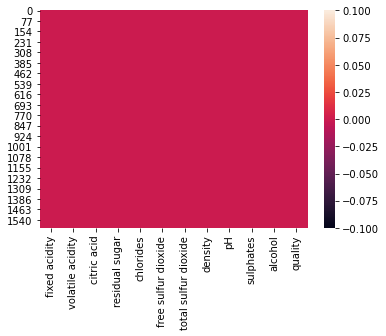

In [88]:
sns.heatmap(ds.isnull())

From above we can observe that there are no missing values in dataset.

In [89]:
ds['quality'].unique()
ds['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

quality have unique values starting from 3 to 8 and mentioned above their counts for each quality in dataset

Target variable ranges from 3 to 8 where 3 is low and 8 depicts good quality , is discrete and categorial in nature

The quality of wine is having most concentrated values in 5,6,& 7

Few observations are present in 3 & 8

In [90]:
ds.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [91]:
ds['residual sugar'].unique()
ds['residual sugar'].value_counts()

2.00    156
2.20    131
1.80    129
2.10    128
1.90    117
       ... 
3.45      1
2.85      1
7.00      1
5.40      1
7.30      1
Name: residual sugar, Length: 91, dtype: int64

# Statistical Description 

In [92]:
ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1.The mean of all variables is more than its median(50%tile).
2.There is large difference in 75% tile and max value of residual suagr,free sulphur dioxide and total sulfur dioxide variables
3.Std is less than mean in all columns shows reliable data and spreaded near to mean.
4.From observations 1 and 2 suggests that there are extreme outliers in these 3 columns

# Univariate analysis

Will visulaize the concerntration of quality in plot.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

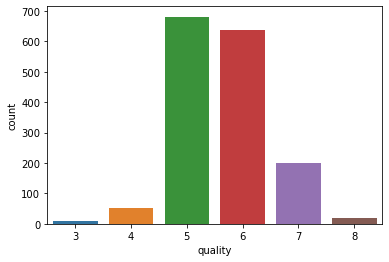

In [93]:
sns.countplot(x='quality',data=ds)
ds['quality'].unique()
ds['quality'].value_counts()

Checking the distribution of skewness

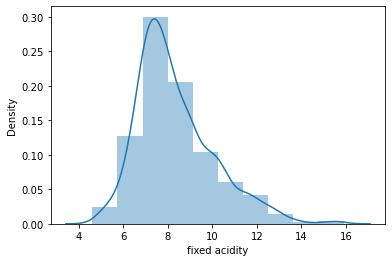

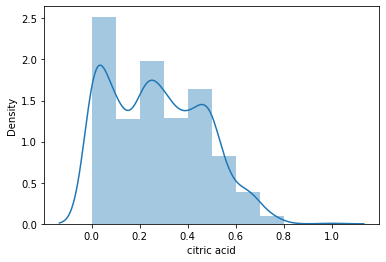

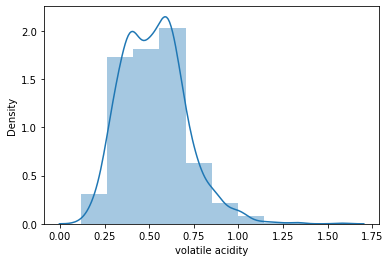

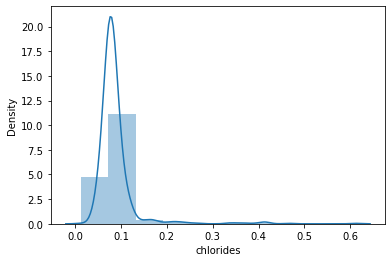

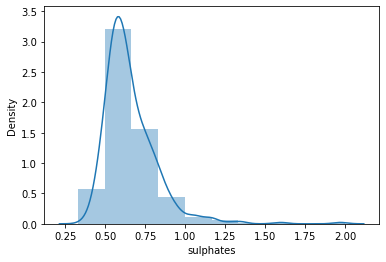

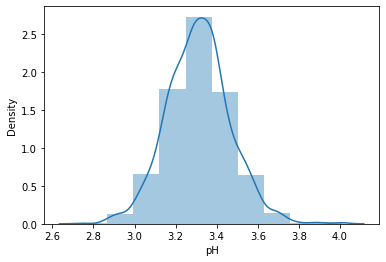

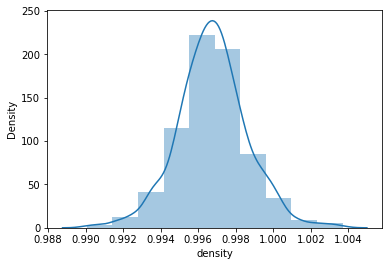

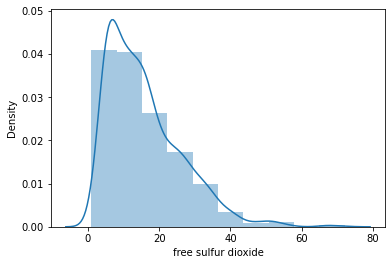

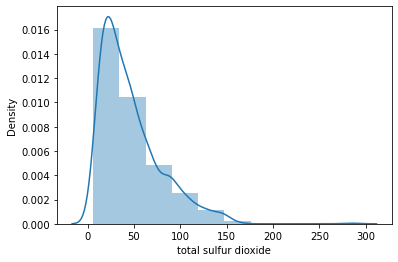

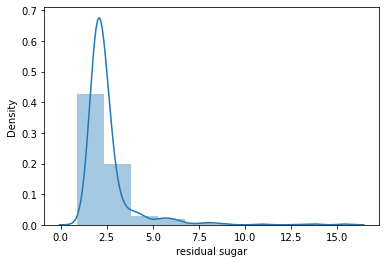

In [94]:
columns=['fixed acidity','citric acid','volatile acidity','chlorides','sulphates','pH','density','free sulfur dioxide','total sulfur dioxide','residual sugar']
for i in columns:
    plt.figure()
    sns.distplot(ds[i],bins=10)

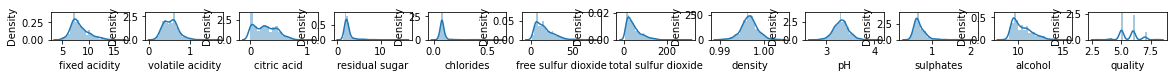

In [95]:
collist=ds.columns.values
ncol=12
nrows=10
plt.figure(figsize=(20,6))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(ds[collist[i]])

From above dist plots we can observe that ph & density variable is normally distributed otherwise all other independent variables are right sided positively skewed

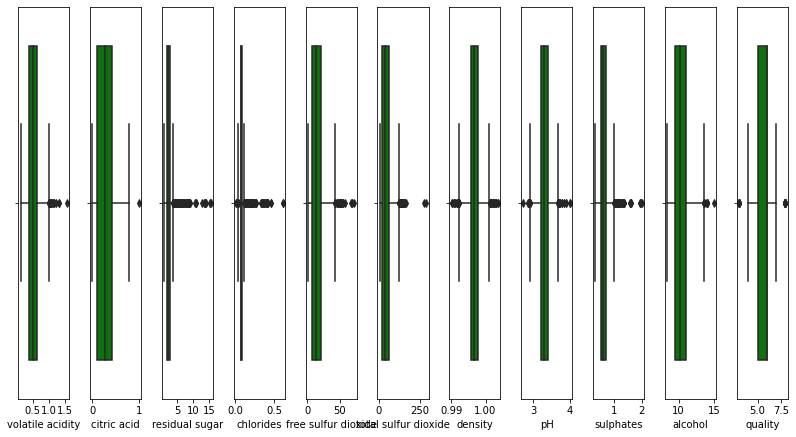

In [96]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(ds[collist[i]],color='green',orient='v')
    plt.tight_layout()

From above graph we can notice the outliers  in residual sugar,sulphur dioxide and sulphates

# Bivariate Analysis

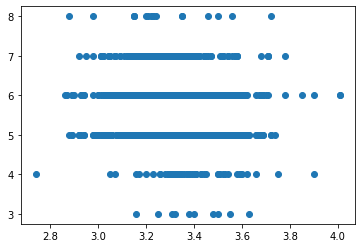

In [97]:
plt.scatter(x='pH',y='quality',data=ds)

Scatter plot shows that as the pH level increases the quality is wine is less than 7 its having inverse relationship with quality

Text(0.5, 1.0, 'fixed acidity and quality')

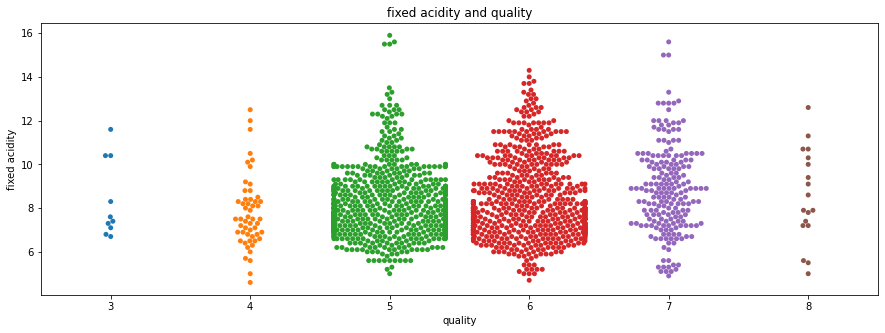

In [98]:
plt.figure(figsize=(15,5))
sns.swarmplot(x= "quality", y="fixed acidity" , data = ds) 
plt.title('fixed acidity and quality')

Fixed acidity concertration is ranges more between 8-10 with increase in quality of wine.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

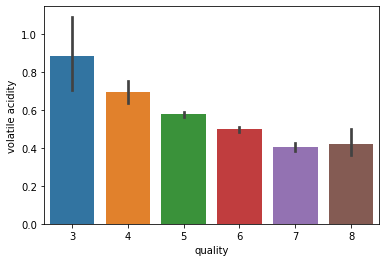

In [99]:
sns.barplot(x='quality',y='volatile acidity',data=ds)

At low quality of wine the volatile acidity concentration is more , while at goo d quality its decreasing showing the inverse relationship between both of them

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

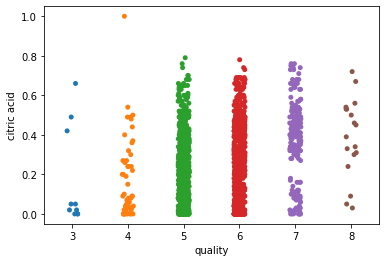

In [100]:
sns.stripplot(x='quality',y='citric acid',data=ds)

Level of citric acid is more with increase in quality of wine shows positive relationship between two

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

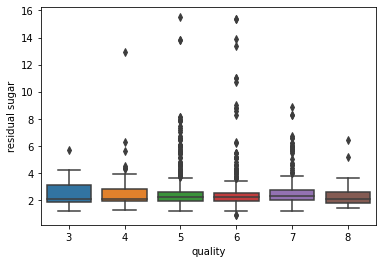

In [101]:
sns.boxplot(x='quality',y='residual sugar',data=ds)

Concentration of residual suagar is reducing with increase in quality of wine as well as there are noticable outliers in residual variable

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

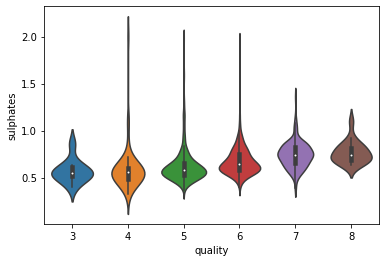

In [102]:
sns.violinplot(x='quality',y='sulphates',data=ds)

Increase in suplphate level in samples depicts the positive increase in avg quality of wine

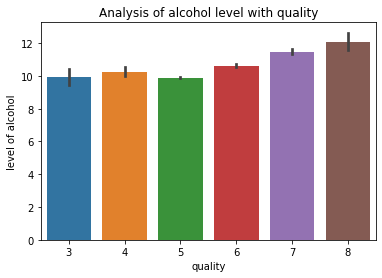

In [103]:
sns.barplot(x='quality',data=ds,y='alcohol')
plt.ylabel('level of alcohol')
plt.xlabel('quality')
plt.title('Analysis of alcohol level with quality')
plt.show()

From bar graph we can observe that concentration level of alcohol is high with increase in quality of wine.

# Multi-Variate Analysis

Will check the co-relation for each of variables with quality and other attributes

<AxesSubplot:>

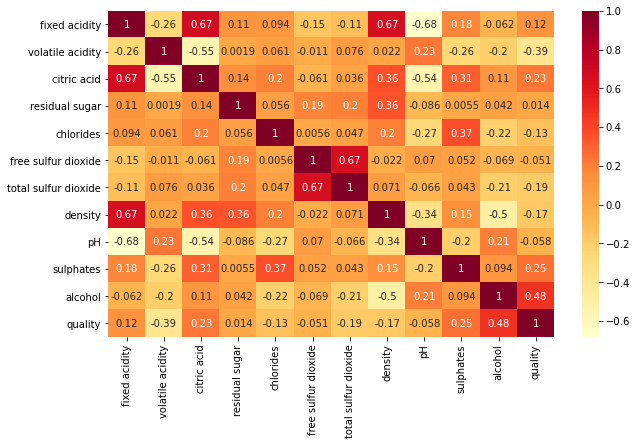

In [104]:
dscorr=ds.corr()
plt.figure(figsize=(10,6))
sns.heatmap(dscorr,cmap='YlOrRd',annot=True)

Light shades are highly correlated

quality is highly correlated with alcohol
alcohal is highly negatively correlated with density with -0.5
density is highly +ve correlated with residual sugar & fixed acidity
volatile acidity is negatively correlated with quality
free sulphuric dioxide is highly correlated with total sulphur dioxide

# Relation between independent variables with each other

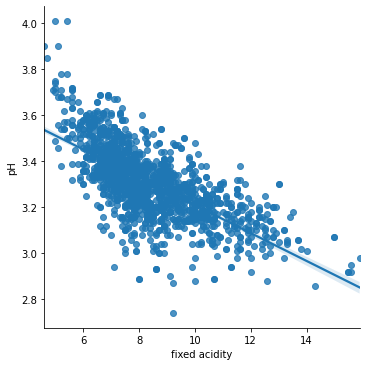

In [105]:
sns.lmplot(x="fixed acidity", y="pH", data=ds)

Relation between fixed acidity and ph is inverse as level of fixed acidity will increase there by concentration of ph is decreasing

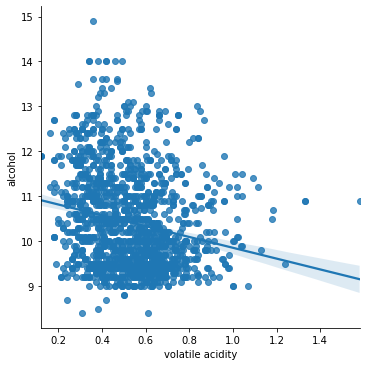

In [106]:
sns.lmplot(x="volatile acidity", y='alcohol', data=ds)

While volatile acidity between 0.4-0.8 is having concentration of alcohol is more

<Figure size 1440x360 with 0 Axes>

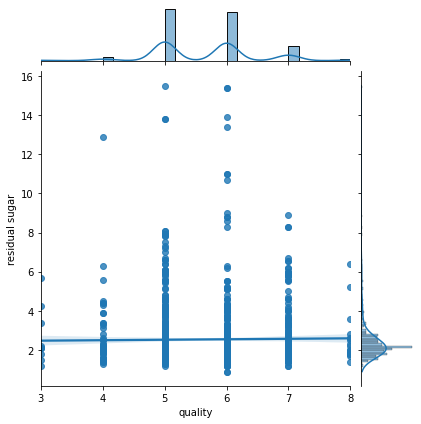

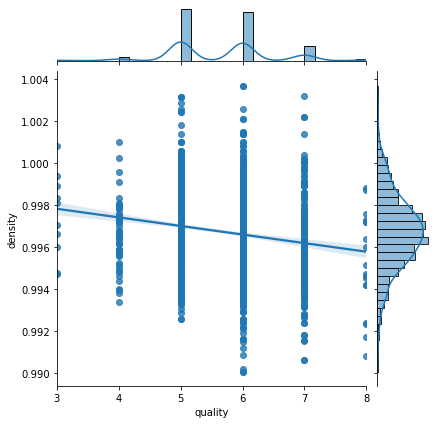

In [107]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=ds, x='quality', y='residual sugar',  kind='reg')
_ = sns.jointplot(data=ds, x='quality', y='density', kind='reg')

With increase in quality of wine residual sugar level is sightly change or weak correlated.
While density concentration is more with high quality of wine and vice versa , as well as data is symetric distributed 

In [108]:
bins = (2, 6.5, 8)
labels = ['bad', 'good']
ds['quality'] = pd.cut(x = ds['quality'], bins = bins, labels = labels)

In [109]:
ds['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

As we have Target variabel discrete and categorial in nature so same has been categorized in bad and good quality 
above 7 is categorized as good and lower than 7 it is bad.

From above we can see class is imbalanced due to discrete 

Labeling the target variable as it is now string in nature

In [110]:
le=LabelEncoder()
ds['quality']=le.fit_transform(ds['quality'].astype(str))

In [111]:
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Quality range (0-10) has been divided in following manner:
    
    1.Good Quality:7-10
    2.Bad Quality:0-6
        
Further same has been converted into arbitary property through Label encoding.
     1.Good Quality-1
     2.Bad Quality-0

<Figure size 1440x432 with 0 Axes>

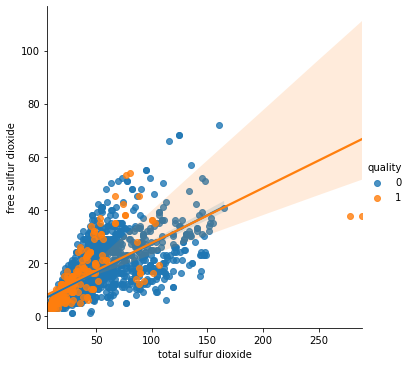

In [112]:
plt.figure(figsize=(20,6))
sns.lmplot(x='total sulfur dioxide',y='free sulfur dioxide',hue='quality',data=ds)

Increase in level of total and free sulphur dioxide leading to low quality of wine and shows that more concerntration of both making the more bad quality of wine.

<Figure size 1440x360 with 0 Axes>

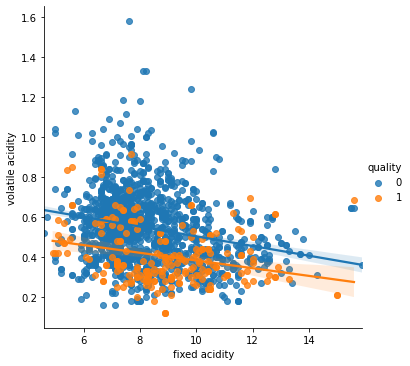

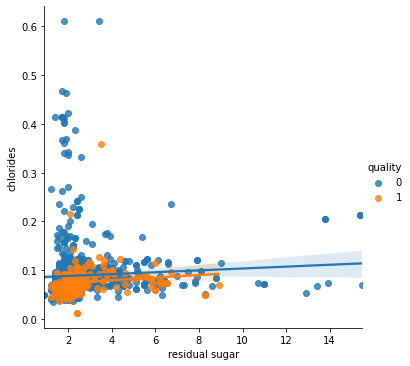

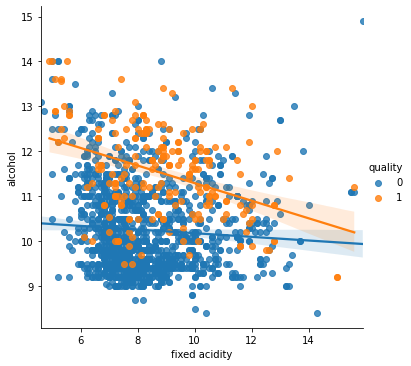

In [113]:
plt.figure(figsize=(20, 5))

_ = sns.lmplot(data=ds, x='fixed acidity', y='volatile acidity', hue='quality', fit_reg=True)
_ = sns.lmplot(data=ds, x='residual sugar', y='chlorides', hue='quality', fit_reg=True)
_ =sns.lmplot(data=ds,x='fixed acidity',y='alcohol',hue='quality',fit_reg=True)

1. From above graph it can be observed that volatile acidity till 0.55 mm concentration makes good quality of wine and fixed acidity lies between 7 to 13 mm level leads to quality of wine as good one.

Both are negatively co-related to each other

2.Chlorides and residual sugar till some extent of quantity affect the quality of wine or having little effect on predictions the quality of wine

3.Fixed acidity and level of alcohol is positively related and affecting the quality of wine
Alcohol level from 10-14 mm concentration leads to good quality of wine.

From these plots, we can see: - Higher pH, higher sulphates, higher alcohol and higher fixed acidity are more likely to indicate red wines with higher quality - it’s hard to judge quality by density, chlorides and residual sugar values

# Checking outliers statistically

In [114]:
zscr=np.abs(zscore(ds))
threshold=3
print(np.where(zscr>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [115]:
zscr[13][9]

5.32210116796055

In [116]:
zscr[1574][3]

8.060516762374213

# Removing Oultiers

In [117]:
df=ds[(zscr<3).all(axis=1)]
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [118]:
print('Shape of dataset before outliers',ds.shape)
print('Shape of dataset after removing outliers',df.shape)
print('Loss of data is :',(ds.shape[0]-df.shape[0])/ds.shape[0])

Shape of dataset before outliers (1599, 12)
Shape of dataset after removing outliers (1458, 12)
Loss of data is : 0.08818011257035648


After removing the outliers there is loss of 8.8% data through zscore

# Preparing the data for training and testing split

In [119]:
x=df.iloc[:,0:11]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [120]:
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1458, dtype: int32

# Training the model

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1020, 11)
(1020,)
(438, 11)
(438,)


So,70% of data is getting trained and 30 % will be tested on model for predictions at random_state=45

# Model Fitting through Classification Methods

Logistic Regression

In [122]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8744292237442922
[[357  14]
 [ 41  26]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       371
           1       0.65      0.39      0.49        67

    accuracy                           0.87       438
   macro avg       0.77      0.68      0.71       438
weighted avg       0.86      0.87      0.86       438



From Logistic regression we are getting testing accuracy of 88% on model while false negative and positive values are reflecting which will give us wrong predictions about the quality

Decision Tree classifier

In [123]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predd=dtc.predict(x_test)
print(accuracy_score(y_test,predd))
print(confusion_matrix(y_test,predd))
print(classification_report(y_test,predd))

0.8401826484018264
[[331  40]
 [ 30  37]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       371
           1       0.48      0.55      0.51        67

    accuracy                           0.84       438
   macro avg       0.70      0.72      0.71       438
weighted avg       0.85      0.84      0.84       438



Support Vector Classifier

In [124]:
kernellist=['linear','rbf','poly']
for i in kernellist:
    sv=SVC(kernel=i)
    sv.fit(x_train,y_train)
    preds=sv.predict(x_test)
    print('Accuracy score of',i,'is:')
    print(accuracy_score(y_test,preds))
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))

Accuracy score of linear is:
0.8470319634703196
[[371   0]
 [ 67   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       371
           1       0.00      0.00      0.00        67

    accuracy                           0.85       438
   macro avg       0.42      0.50      0.46       438
weighted avg       0.72      0.85      0.78       438

Accuracy score of rbf is:
0.8470319634703196
[[371   0]
 [ 67   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       371
           1       0.00      0.00      0.00        67

    accuracy                           0.85       438
   macro avg       0.42      0.50      0.46       438
weighted avg       0.72      0.85      0.78       438

Accuracy score of poly is:
0.8470319634703196
[[371   0]
 [ 67   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       371
           1       0.00      

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
predk=knn.predict(x_test)
print(accuracy_score(y_test,predk))
print(confusion_matrix(y_test,predk))
print(classification_report(y_test,predk))

0.8378995433789954
[[359  12]
 [ 59   8]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       371
           1       0.40      0.12      0.18        67

    accuracy                           0.84       438
   macro avg       0.63      0.54      0.55       438
weighted avg       0.79      0.84      0.80       438



# From Naive_Bayes will use GaussianNB as target value is categorial in 2 classes or arbitary data

In [126]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

0.8493150684931506
[[326  45]
 [ 21  46]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       371
           1       0.51      0.69      0.58        67

    accuracy                           0.85       438
   macro avg       0.72      0.78      0.75       438
weighted avg       0.87      0.85      0.86       438



# Ensemble methods

In [127]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print(accuracy_score(y_test,predr))
print(confusion_matrix(y_test,predr))
print(classification_report(y_test,predr))

0.8972602739726028
[[359  12]
 [ 33  34]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       371
           1       0.74      0.51      0.60        67

    accuracy                           0.90       438
   macro avg       0.83      0.74      0.77       438
weighted avg       0.89      0.90      0.89       438



In [128]:
grd=GradientBoostingClassifier(n_estimators=100)
grd.fit(x_train,y_train)
predgr=grd.predict(x_test)
print(accuracy_score(y_test,predgr))
print(confusion_matrix(y_test,predgr))
print(classification_report(y_test,predgr))

0.8949771689497716
[[357  14]
 [ 32  35]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       371
           1       0.71      0.52      0.60        67

    accuracy                           0.89       438
   macro avg       0.82      0.74      0.77       438
weighted avg       0.89      0.89      0.89       438



In [129]:
Models=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier(),GradientBoostingClassifier()]

for m in Models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m ,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('/n')

Accuracy score of LogisticRegression() is:
0.8744292237442922
[[357  14]
 [ 41  26]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       371
           1       0.65      0.39      0.49        67

    accuracy                           0.87       438
   macro avg       0.77      0.68      0.71       438
weighted avg       0.86      0.87      0.86       438

/n
Accuracy score of DecisionTreeClassifier() is:
0.8470319634703196
[[331  40]
 [ 27  40]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       371
           1       0.50      0.60      0.54        67

    accuracy                           0.85       438
   macro avg       0.71      0.74      0.73       438
weighted avg       0.86      0.85      0.85       438

/n
Accuracy score of SVC() is:
0.8470319634703196
[[371   0]
 [ 67   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.

Before hypertuning and cross validating the Random forest model performing with 90% accuracy as well as having less predictions of false negative & positive values

# Cross Validation score for setting the under and over fitting of samples

In [130]:
lgscores=cross_val_score(lg,x,y,cv=10)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.87671233 0.88356164 0.8630137  0.88356164 0.91780822 0.89041096
 0.88356164 0.87671233 0.85517241 0.89655172]
0.8827066603684459 0.016441307511730886


In [131]:
dtscores=cross_val_score(dtc,x,y,cv=10)
print(dtscores)
print(dtscores.mean(),dtscores.std())

[0.87671233 0.87671233 0.74657534 0.80136986 0.88356164 0.79452055
 0.75342466 0.81506849 0.87586207 0.82758621]
0.8251393481341521 0.04922470124501639


In [132]:
svscores=cross_val_score(sv,x,y,cv=10)
print(svscores)
print(svscores.mean(),svscores.std())

[0.8630137  0.8630137  0.8630137  0.8630137  0.8630137  0.8630137
 0.8630137  0.85616438 0.86206897 0.86206897]
0.8621398205007085 0.002026364438242961


In [133]:
knscores=cross_val_score(knn,x,y,cv=10)
print(knscores)
print(knscores.mean(),knscores.std())

[0.84931507 0.85616438 0.82876712 0.84931507 0.89726027 0.84931507
 0.81506849 0.82191781 0.87586207 0.84827586]
0.8491261218705715 0.023230966115421872


In [134]:
gbscores=cross_val_score(gnb,x,y,cv=10)
print(gbscores)
print(gbscores.mean(),gbscores.std())

[0.89726027 0.88356164 0.76027397 0.82876712 0.94520548 0.85616438
 0.75342466 0.84931507 0.86206897 0.87586207]
0.8511903637222484 0.0557594818903005


In [135]:
rfscores=cross_val_score(rf,x,y,cv=10)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.89726027 0.89041096 0.91780822 0.89041096 0.9109589  0.8630137
 0.85616438 0.89726027 0.86206897 0.91724138]
0.8902598016060462 0.021709453039489887


In [136]:
grdscores=cross_val_score(grd,x,y,cv=10)
print(grdscores)
print(grdscores.mean(),grdscores.std())

[0.89726027 0.89041096 0.84246575 0.88356164 0.93150685 0.83561644
 0.82191781 0.89041096 0.88275862 0.86206897]
0.8737978271138405 0.03142778664535645


In [137]:
cross=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier(),GradientBoostingClassifier()]

for i in cross:
    scores=cross_val_score(i,x,y,cv=10)
    print('The mean scores of ',i,'is:',scores.mean())
    print('/n')

The mean scores of  LogisticRegression() is: 0.8827066603684459
/n
The mean scores of  DecisionTreeClassifier() is: 0.8367737364194616
/n
The mean scores of  SVC() is: 0.8621398205007085
/n
The mean scores of  KNeighborsClassifier() is: 0.8477798771846953
/n
The mean scores of  GaussianNB() is: 0.8511903637222484
/n
The mean scores of  RandomForestClassifier() is: 0.88203589985829
/n
The mean scores of  GradientBoostingClassifier() is: 0.8737978271138405
/n


Out of 7 models cross validting still Random forest classifier is performing with highest accuracy of 89%

# Hypertuning of Parameters

In [138]:
grid_param={'criterion':['gini','entropy'],'max_depth':[9,10,11],'min_samples_leaf':[2,3,5]}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=10)

gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2}
0.8559707132735003


In [139]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=2)
dtc.fit(x_train,y_train)
predd=dtc.predict(x_test)
print(accuracy_score(y_test,predd))
print(confusion_matrix(y_test,predd))
print(classification_report(y_test,predd))

0.8744292237442922
[[353  18]
 [ 37  30]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       371
           1       0.62      0.45      0.52        67

    accuracy                           0.87       438
   macro avg       0.77      0.70      0.72       438
weighted avg       0.86      0.87      0.87       438



In [140]:
parameters={'kernel':['linear','rbf','poly'],'C':[1,10]}
clf=GridSearchCV(sv,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [141]:
sv=SVC(kernel='linear',C=1)
sv.fit(x,y)
preds=sv.predict(x_test)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

0.8470319634703196
[[371   0]
 [ 67   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       371
           1       0.00      0.00      0.00        67

    accuracy                           0.85       438
   macro avg       0.42      0.50      0.46       438
weighted avg       0.72      0.85      0.78       438



In [ ]:
grid_param={'criterion':['gini','entropy'],'max_depth':[9,10,11],'min_samples_leaf':[2,3,5]}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=10)

gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

In [143]:
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=11,min_samples_leaf=2)
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print(accuracy_score(y_test,predr))
print(confusion_matrix(y_test,predr))
print(classification_report(y_test,predr))

0.8949771689497716
[[361  10]
 [ 36  31]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       371
           1       0.76      0.46      0.57        67

    accuracy                           0.89       438
   macro avg       0.83      0.72      0.76       438
weighted avg       0.89      0.89      0.88       438



After hypertuning of parameters Random forest model is performing with best accuracy of 89% in compare to other classifier models

# ROC_AUC CURVE & SCORE

 Will visulaze the area under precision -recall curve as well as Receiver operating characteristic (ROC)curve 

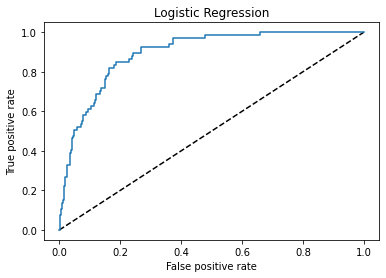

0.6751619262179668


In [144]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

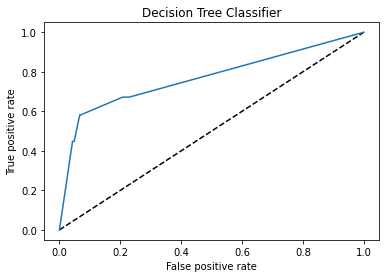

0.6996218369071087


In [145]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
print(auc_score)

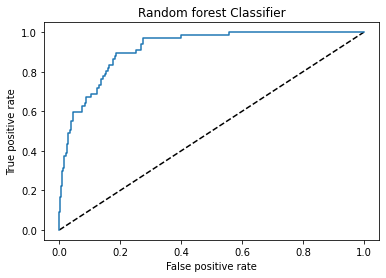

0.7178661946333025


In [146]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random forest Classifier')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print(auc_score)

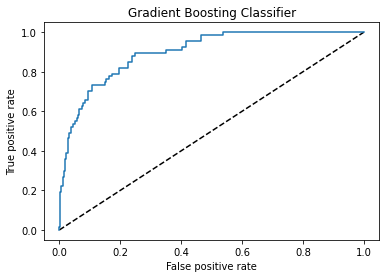

0.7423261053224444


In [147]:
y_pred_prob=grd.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gradient Boosting Classifier')
plt.show()
auc_score=roc_auc_score(y_test,grd.predict(x_test))
print(auc_score)

# Conculsion

From ROC_AUC curve Gradient Boosting Classifier model is performing best in compare to other classifier method as its showing the less false postive rate and sharpness of curve is towards 75%

# Predictions

In [148]:
print('Predicted score:',predgr)
print('Actual score:',y_test)

Predicted score: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
Actual score: 816     0
420     1
1592    0
764     0
924     0
       ..
204     0
446     0


As we can see the predicted and expected values are moslty matching .

# Loading the model in obj file

In [149]:
import joblib
joblib.dump(grd,'grd_model.obj')

['grd_model.obj']

# Re-loading the obj file

In [150]:
gdfile=joblib.load('grd_model.obj')
gdfile.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

obj file is working fine and predicting the values in required manner